$\textbf{QUESTION 3.1}$

1) Let $f_{i} = f(x)$, $f_{i + 1} = f(x + h)$ and $f_{i + 2} = f(x + 2h)$. The latter two evaluations on the function can be expanded into a Taylor series. In other words,

$$f_{i + 1} = f(x + h) = f(x) + hf'(x) + \frac{h^{2}}{2}f''(x) + O(h^{3}) = f_{i} + hf_{i}' + \frac{h^2}{2}f_{i}'' + O(h^3) \, \text{and}$$

$$f_{i + 2} = f_{i} + 2hf_{i}' + 2h^{2}f_{i}'' + O(h^3).$$

We would like to use this stencil of points to construct a finite difference formula for the derivative of $f$ at $x$. Let $a,b,c \in \mathbb{R}$. Then the linear combination of the points in our stencil is

$$af_{i} + bf_{i + 1} + cf_{i + 2} = (a + b + c)hf_{i} + (b + 2c)f_{i}' + \left(\frac{b}{2} + 2c\right)hf_{i}'' + O(h^{3}). $$

In order to get an expression for the derivative we need to impose the following conditions:

$$a + b + c = 0,$$
$$b + 2c = 1,$$
$$b + 4c = 0.$$

The solutions to these equations are $$a = -\frac{3}{2}, b = 2, c = -\frac{1}{2},$$
therefore the expression baove becomes

$$-\frac{3}{2}f_{i} + 2f_{i+1} - \frac{1}{2}f_{i+2} = hf_{i}' + O(h^3).$$

Finally rearranging such an expression gives us

$$f_{i}' = \frac{-3f_{i} + 4f_{i+1} - f_{i+2}}{2h} + O(h^2)$$

$$\Rightarrow f'(x) = \frac{-3f(x) + 4f(x+h) - f(x+2h)}{2h} + O(h^2).$$


2) In this question we would like to analytically derive an expression for the derivative of $f(x) = \sin(\exp(x))$ evaluated at $x = 1$. In order to find the derivative of $f$ we use the chain rule. Let $u = exp(x)$. Then

$$ \frac{df}{dx} = \frac{df}{du}\frac{du}{dx} = \cos(u)\exp(x) $$

$$ \Rightarrow f'(x) = \cos(\exp(x))\exp(x) $$

$$ \Rightarrow f'(1) = e\cos(e).$$

3) Below is a graph which plots the absolute difference between the analytical and finite difference versions of $f'(1)$. The maximum precision that can be reached with the bracketing annd bisection method using Float64 arithmetic is 16 decimal places.


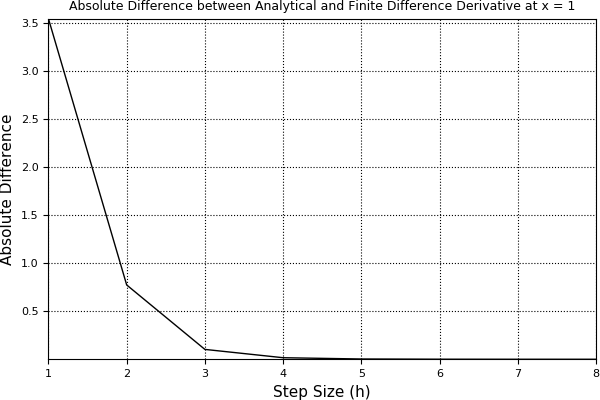

In [38]:
using Plots
pyplot()
include("worksheet3functions.jl")

derivf = e*cos(e) # Analytic derivative of f(x) at x = 1 to within machine precision.

x = collect(1:30)
X = zeros(length(x))
Y = zeros(length(x))

for i in x
   X[i] = 2^(Float64(-i))
end

# Here we create a vector, DF, of finite difference derivatives of f(x) at x = 1. Y is a vector of respective absolute 
# differences between our estimate and the actual evaluation of our derivative.

DF = zeros(length(x))
for i in x
    DF[i] = df(1,X[i])
    Y[i] = abs(DF[i] - derivf)
end

plot(x,Y,legend = false, xlims = (1,8), color = "black")
xlabel!("Step Size (h)")
ylabel!("Absolute Difference")
title!("Absolute Difference between Analytical and Finite Difference Derivative at x = 1", titlefont = font(9))

4) f'(1) is derived below using dual numbers.

In [10]:
using DualNumbers
x = Dual(1,1)
y = sin(exp(x))
d = dualpart(y)

epsm = 2.22*10^(Float64(-16)) # Our error in correspondence with double precision.

if abs(d - e*cos(e)) < epsm
    println("Our dual number derivative, f'(1) = $d, is acurate to within machine precision, epsm = $epsm.")
end

Our dual number derivative, f'(1) = -2.478349732955235, is acurate to within machine precision, epsm = 2.22e-16.


$\textbf{QUESTION 3.2}$

1) In this question we would like to find the roots of $f(x) = \sin(\exp(x))$ where $x \in [0,2]$. Therefore we need to calculate $\sin(\exp(x)) = 0 \Rightarrow \exp(x) = n\pi$ where $n \in \mathbb{Z}$. Consequentially, $ x = \ln(n\pi)$. Next we need to find possible $n$ which cause $n\pi$ to lie in our desired range.
$$ \ln(0) = -\infty, \ln(\pi) = 1.14 \: \text{(2 decimal places)}, \: \ln(2\pi) = 1.84 \: \text{(2 decimal places), and} \: \ln(3\pi) = 2.24 \: \text{(2 decimal places)} .$$
Hence the only roots of $f(x)$ where $x \in [0,2]$ is $r_1 = \ln(\pi)$ and $r_2 = \ln(2\pi)$.

2) A graph of the absolute error of the root derived using the bracketing-bisection method is provided below. From the graph provided we can see that the error decreases at roughly an exponential rate as the number of iterations increases.


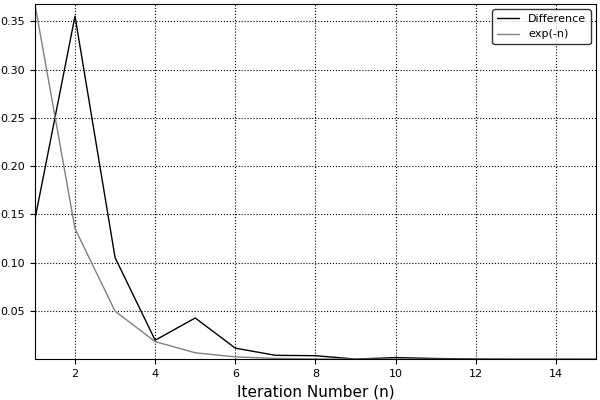

In [34]:
function f(s)
    return sin(exp(s))
end

function fprime(s)
    return cos(exp(s))*exp(s)
end

epstot = 10^(-8.0) # A set value for epstot will will be used to break the bracketing-bisection algorithm.

# Initial conditions for while loop.
a = 0
b = 2
mid = 1
fa = f(a)

Xbis = [] # An empty array in which consecutive midpoints will be appended.

while b - a > epstot
    mid = (a + b)/2.0
    fm = f(mid)
    if fa*fm > 0
        a = mid
        fa = fm
        append!(Xbis,mid)
    else
        b = mid
        append!(Xbis,mid)
    end
end

r1 = log(pi)
Xbisdiff = abs(Xbis - r1)
Ebis = zeros(length(Xbis)) # Vector which will be filled with consecutive evaluations of exp(-x). 

for i = 1:length(Xbis)
    Ebis[i] = exp(-i)
end

l = collect(1:length(Xbis))
plot(l,Xbisdiff,label = "Difference", xlims = (1,15),color = "black")
plot!(l,Ebis,label = "exp(-n)",colour = "grey")
xlabel!("Iteration Number (n)")

The maximum precision that can be reached with the bracketing-bisection method using Float64 arithmetic is 16 decimal places.

3) In this question we now explore the effectiveness of the Newton-Raphson method. The relevant graph for this question is provided below. From this graph, the absolute difference convereges to zero faster than exponential decay and is therefore a faster process used to find the root of a function than the bracketing-bisection method.


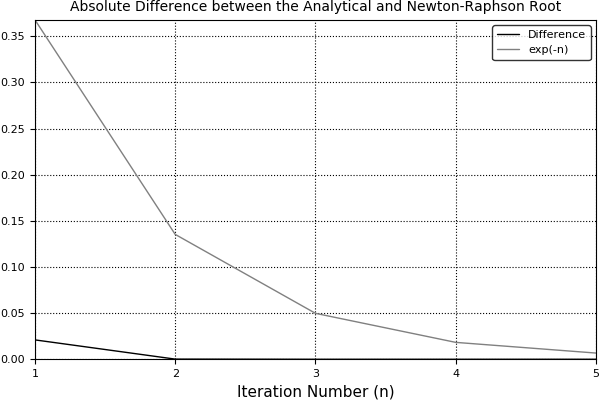

In [35]:
m = 1
Xnewt = []

while abs(f(m)) > epsm
    d = -f(m)/fprime(m)
    m += d
    append!(Xnewt,m)
end

Xnewtdiff = abs(Xnewt - r1)
Enewt = zeros(length(Xnewt)) # Vector which will be filled with consecutive evaluations of exp(-x). 

for i = 1:length(Xnewt)
    Enewt[i] = exp(-i)
end

m = collect(1:length(Xnewt))

plot(m,Xnewtdiff,label = "Difference",color = "black")
plot!(m,Enewt,label = "exp(-n)",color = "grey")
xlabel!("Iteration Number (n)")
title!("Absolute Difference between the Analytical and Newton-Raphson Root", titlefont = font(10))

$\textbf{QUESTION 3.3}$

1) We would now like to find the local minima of $f(x) = \sin(\exp(x))$ where $x \in [0,2]$. In order to do so we must first solve the following equation.
$$f'(x_{\text{min}}) = \cos(\exp(x_{\text{min}}))\exp(x_{\text{min}}) = 0.$$
Since $\exp(x_{\text{min}}) \neq 0$ we must have $\cos(\exp(x_{\text{min}})) = 0$ which means
$\exp(x_{\text{min}}) = \Big(\frac{1}{2} + k \Big)\pi$ where $k \in \mathbb{Z}$. Therefore,
$$x_{\text{min}} = \ln\left(\Big(\frac{1}{2} + k \Big)\pi\right).$$
Given that $0 \leq x \leq 2$, the only possible values for $x_{\text{min}}$ are $m_{1} = \ln\left(\frac{\pi}{2}\right)$ and $m_{2} = \ln\left(\frac{3\pi}{2}\right)$.
$$f''(x) = -\sin(\exp(x))\exp(2x) + \cos(\exp(x))\exp(x) = \exp(x)(\cos(\exp(x)) - \sin(\exp(x))\exp(x))$$
$f''(m_{1})) = -\pi^{2}/4 < 0$ which makes $f(m_{1})$ a maximum. However $f''(m_{2}) = 9\pi^{2}/4 > 0$ which makes 
$f(m_{2})$ a minimum. Therefore the minimum we are looking for occurs when $x = m_{2}$.

2) In this question we will be using the Golden Search Algorithm in order to find the location of the local minimum of f(x), and we will compare this to the analytical expression for the location of the minimum defined above. Below is a graph in which the absolute difference between these two locations in relation to the number of iterations that are carried out during the Golden Search.


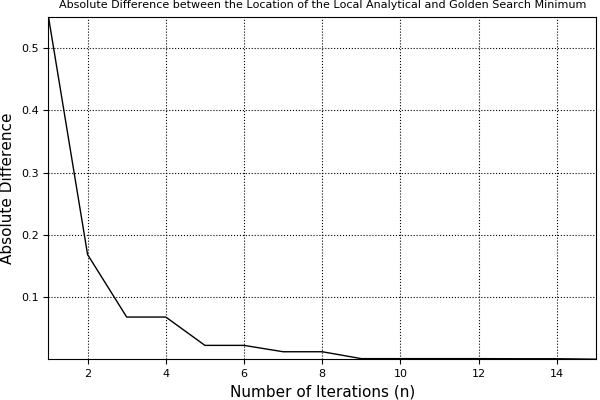

In [37]:
#Golden Search
a = 0
b = 1
c = 2
m2 = log(3pi/2)

w = (sqrt(5) - 1)/2
epstot = 10^(-8.0)

Xgold = [] # An empty array in which the midpoint of each bracketing triple will be appended.

while abs(c - a) > epstot
    if abs(c - b) > abs(b - a)
        x = b + (1 - w)*(c - b)
        if f(b) < f(x)
            (a,b,c) = (a,b,x)
        else 
            (a,b,c) = (b,x,c)
        end
    else
        x = b - (1 - w)*(b - a)
        if f(b) < f(x)
            (a,b,c) = (x,b,c)
        else
            (a,b,c) = (a,x,b)
        end
    end
    append!(Xgold,b)
end

Xgolddiff = abs(Xgold - m2) # A vector of consecutive absolute differences.
n = collect(1:length(Xgold))

plot(n, Xgolddiff, xlims = (1,15), legend = false, color = "black")
title!("Absolute Difference between the Location of the Local Analytical and Golden Search Minimum",
    titlefont = font(8))
xlabel!("Number of Iterations (n)")
ylabel!("Absolute Difference")

3) In this question we assume that $x$ is very close to the minimum $x_{min}$. This allows us to construct the following Taylor expansion:
$$f(x) \approx f(x_{min})\left(1 + \frac{f''(x_{min})}{2f(x_{min})}(x - x_{min})^{2} \right).$$
We first notice that $f(x) > f(x_{min})$ since $f(x_{min})$ is the true local minimum and all other evaluations taken within a neighbourhood of $x_{min}$ must be greater than the evaluation of $f$ at $x$. We can therefore state the following: 
$$f(x) > f(x_{min}) \Rightarrow 1 + \frac{f''(x_{min})}{2f(x_{min})} > 0 \Rightarrow \frac{f''(x_{min})}{2f(x_{min})}(x - x_{min})^{2} > 0 .$$
$$ \therefore \left|\frac{f''(x_{min})}{2f(x_{min})}\right|(x - x_{min})^{2} > 0 $$
So far all of the work that has been done has been completely analytic, however numerically, the lowest absolute value that can be reached is non-zero due to machine precision. Therefore
$$ \left|\frac{f''(x_{min})}{2f(x_{min})}\right|(x - x_{min})^{2} > \epsilon_{m} $$
$$ \Rightarrow (x - x_{min})^{2} > \epsilon_{m}\left|\frac{2f(x_{min})}{f''(x_{min})}\right| $$
$$ \Rightarrow |x - x_{min}| > \sqrt{\epsilon_{m}}\sqrt{\left|\frac{2f(x_{min})}{f''(x_{min})}\right|}. $$
Finally, we let $x_{*} = x_{min}$ giving us the desired result.